In [2]:
!pip install opencv-python

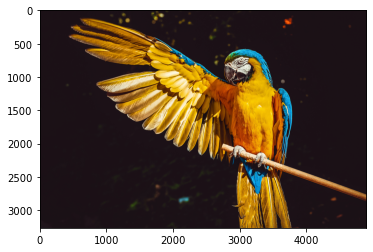

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
img = cv2.cvtColor(cv2.imread('parrot.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [16]:
img.shape

(3264, 4896, 3)

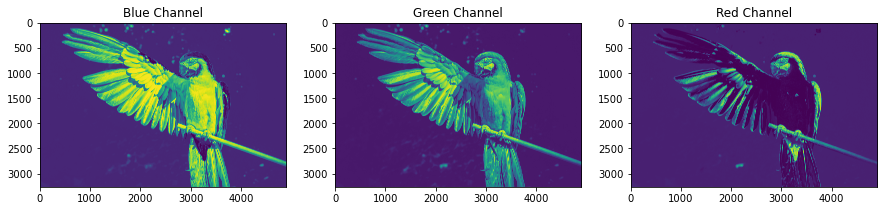

In [17]:
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [18]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895
0,27,27,27,26,26,26,26,26,27,27,...,28,28,28,28,28,28,28,28,28,28
1,27,27,27,27,26,26,26,26,27,27,...,28,28,28,28,28,28,28,28,28,28
2,27,27,27,27,26,26,26,26,27,27,...,28,28,28,28,28,28,28,28,28,28
3,27,27,27,27,27,26,26,26,27,27,...,28,28,28,28,28,28,28,28,28,28
4,27,27,27,27,27,27,27,26,27,27,...,28,28,28,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,32,32,32,32,32,32,32,32,32,32,...,27,27,27,27,27,27,27,27,27,27
3260,32,32,32,32,32,32,32,32,32,32,...,27,27,27,27,27,27,27,27,27,27
3261,32,32,32,32,32,32,32,32,32,32,...,27,27,27,27,27,27,27,27,27,27
3262,32,32,32,32,32,32,32,32,32,32,...,27,27,27,27,27,27,27,27,27,27


In [19]:
df_blue = blue/255
df_green = green/255
df_red = red/255
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(3264, 50)
(3264, 50)
(3264, 50)


In [21]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9321051015925945
Green Channel: 0.8957800039324625
Red Channel  : 0.8518243649597794


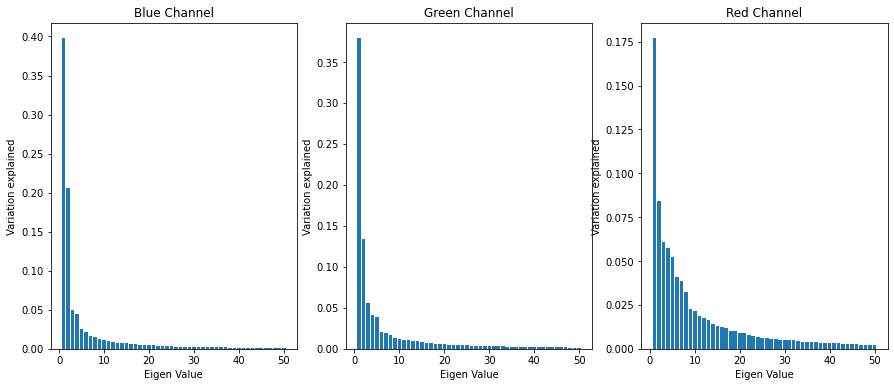

In [22]:
fig = plt.figure(figsize = (15, 6)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [23]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(3264, 4896) (3264, 4896) (3264, 4896)


In [24]:
img_reduced= cv2.merge((b_arr, g_arr, r_arr))
print(img_reduced.shape)

(3264, 4896, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


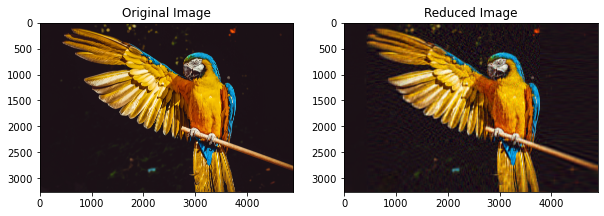

In [25]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()